In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, ifft, ifftshift, rfft
import warnings
warnings.filterwarnings("ignore")

#### Defining Parameters

#### Importing Libraries


In [114]:
numtaps = 1001
band_width = 1000 #Hz
sampling_rate = 204800 #Hz
num_samples = numtaps
frequency_central = 5000


In [125]:
ax

<function ndarray.ravel>

In [128]:
def plotting_raw_data(data): 
    fig, ax = plt.subplots(3,1,figsize=(10,10))

    ax = ax.ravel()

    ax[0].plot(data[0])
    ax[0].set_title('sensor_1')
    ax[0].set_xlabel('samples')
    ax[0].set_ylabel('amplitude')

    ax[1].plot(data[1])
    ax[1].set_title('sensor_2')
    ax[1].set_xlabel('samples')
    ax[1].set_ylabel('amplitude')

    ax[2].plot(data[2])
    ax[2].set_title('sensor_3')
    ax[2].set_xlabel('samples')
    ax[2].set_ylabel('amplitude')

    fig.tight_layout()

#### Loading data

In [123]:
data_path =  r"..\data\avstand_1.npz"
data = np.load(data_path)['data']
s1 = data[0][:num_samples]
s2 = data[1][:num_samples]

noise_path = r"..\data\avstand_1_noise.npz"
data_noise = np.load(noise_path)['data']
q1 = data_noise[0][:num_samples]
q2 = data_noise[1][:num_samples]

mean = 0
std = 1
w1 = np.random.normal(mean, std, size=num_samples)
w2 = np.random.normal(mean, std, size=num_samples)

#### Plotting the raw data

Plotting the signal data
Plotting the noise data


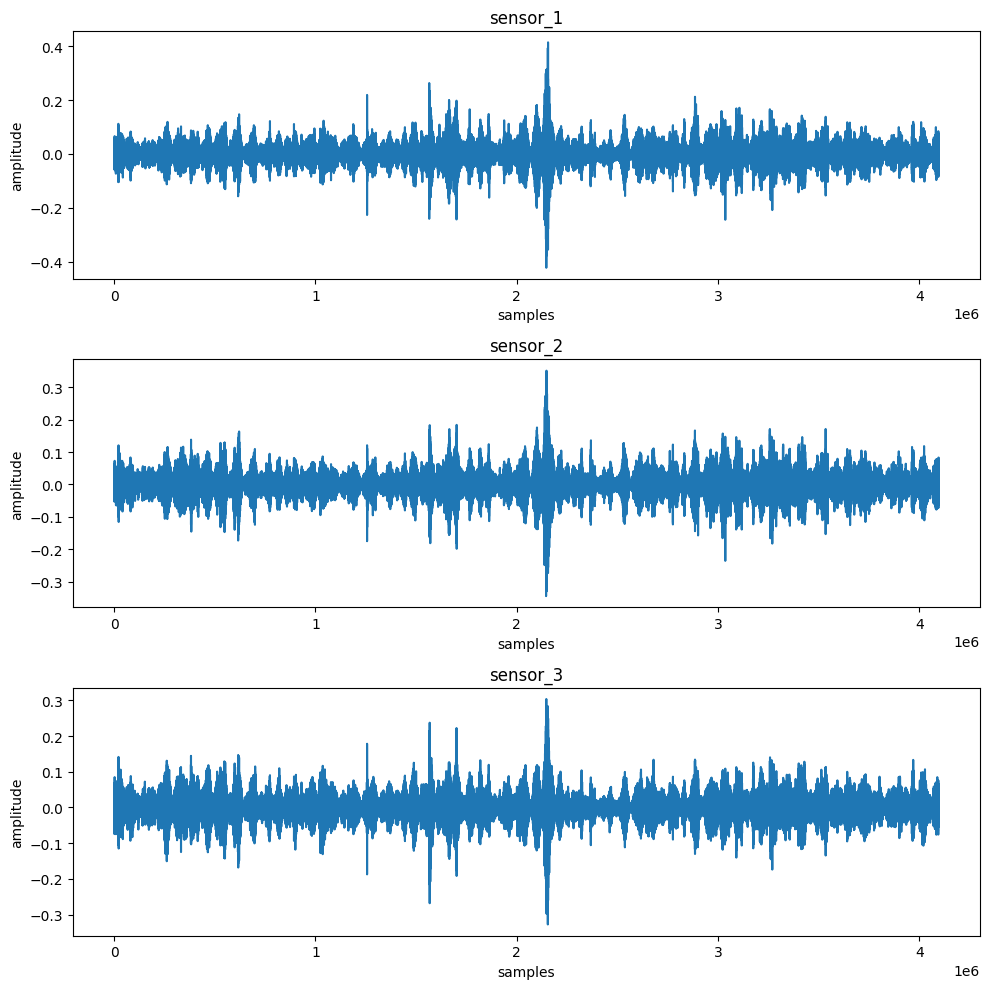

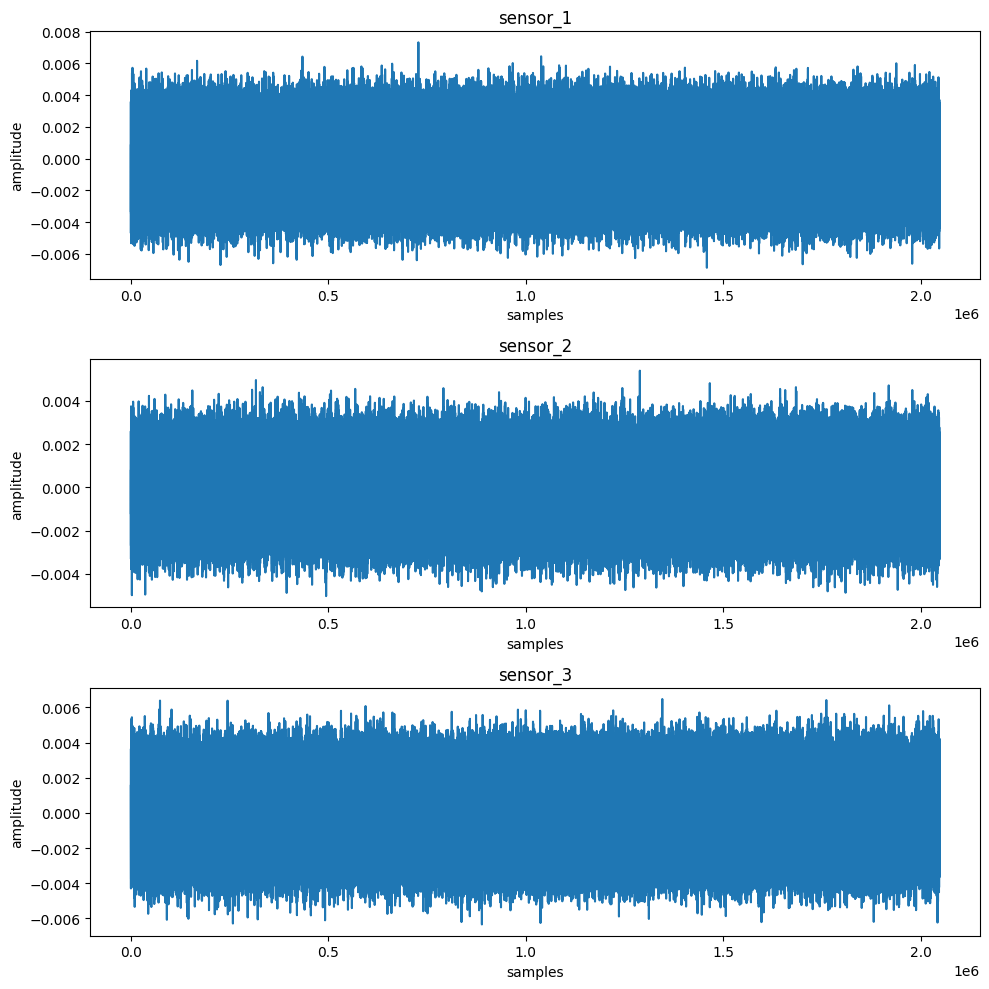

In [129]:
print("Plotting the signal data")
plotting_raw_data(data)

print("Plotting the noise data")
plotting_raw_data(data_noise)

#### Generating filter

In [130]:
filter_coefficients = signal.firwin(numtaps, 
                                    [frequency_central - band_width//2, frequency_central + band_width//2], 
                                    fs=sampling_rate, 
                                    pass_zero="bandpass")

#### Calculating Impulse Response of the system

In [131]:
impulse = np.zeros(num_samples) 
impulse[0] = 1  
h = signal.lfilter(filter_coefficients, 1, impulse)  # Apply the filter to the impulse signal


#### Definerer enkel krysskorrelasjon

In [132]:
def CC(x, y, beta):

    window = signal.windows.boxcar(len(x))
    s1 = x * window
    s2 = y * window
    
    f_s1 = fft(s1)
    f_s2 = fft(s2)

    G12 = f_s1 * np.conj(f_s2)
    denom = abs(G12)
    denom[denom < 1e-6] = 1e-6

    f_s = G12 / denom**beta
    cc12 = ifft(f_s)
    cc12 = ifftshift(cc12)
    cc12 = cc12/np.max(np.abs(cc12))
    return cc12

##### Plotting Functions

In [138]:
def plotting_signal(s1, 
                s1_filt, 
                h, 
                s1_title, 
                s1_filt_title,
                h_title):
    
    '''
    Inputs: 
    s1: array-like
    s1_filt: array-like
    h: array-like

    s1_title: str
    s1_filt_title: str
    h_title: str

    beta: float

    '''

    fig, ax = plt.subplots(3, 1, figsize=(10,5))
    ax = ax.ravel()

    ax[0].plot(s1)
    ax[0].set_title(f"{s1_title}")
    ax[0].set_xlabel("Samples")
    ax[0].set_ylabel("Amplitude")

    ax[1].plot(s1_filt)
    ax[1].set_title(f"{s1_filt_title}")
    ax[1].set_xlabel("Samples")
    ax[1].set_ylabel("Amplitude")

    ax[2].plot(h)
    ax[2].set_title(f"{h_title}")
    ax[2].set_xlabel("Samples")
    ax[2].set_ylabel("Amplitude")

    fig.suptitle(f"{s1_title}, {s1_filt_title} and {h_title}")
    fig.tight_layout()
def plotting_cc(s1, 
                s1_filt, 
                h, 
                s1_title, 
                s1_filt_title,
                h_title,
                beta):
    
    
    fig, ax = plt.subplots(3, 3, figsize=(10,10))
    ax = ax.ravel()

    cc_s1_s1 = CC(s1, s1, beta)
    cc_s1_s1_filt = CC(s1, s1_filt, beta)
    cc_s1_h = CC(s1, h, beta)

    cc_s1_filt_s1 = CC(s1_filt, s1, beta)
    cc_s1_filt_h = CC(s1_filt, h, beta)
    cc_s1_filt_s1_filt = CC(s1_filt, s1_filt, beta)

    cc_h_s1 = CC(h, s1, beta)
    cc_h_s1_filt = CC(h, s1_filt, beta)

    cc_h_h = CC(h, h, beta)


    ax[0].plot(cc_s1_s1)
    ax[0].set_title(f"corr({s1_title},{s1_title})")

    ax[1].plot(cc_s1_s1_filt)
    ax[1].set_title(f"corr({s1_title},{s1_filt_title})")

    ax[2].plot(cc_s1_h)
    ax[2].set_title(f"corr({s1_title},{h_title})")

    ax[3].plot(cc_s1_filt_s1)   
    ax[3].set_title(f"corr({s1_filt_title},{s1_title})")

    ax[4].plot(cc_s1_filt_s1_filt)
    ax[4].set_title(f"corr({s1_filt_title},{s1_filt_title})")

    ax[5].plot(cc_s1_filt_h)
    ax[5].set_title(f"corr({s1_filt_title},{h_title})")

    ax[6].plot(cc_h_s1)
    ax[6].set_title(f"corr({h_title},{s1_title})")

    ax[7].plot(cc_h_s1_filt)
    ax[7].set_title(f"corr({h_title},{s1_filt_title})")

    ax[8].plot(cc_h_h)
    ax[8].set_title(f"corr({h_title},{h_title})")

    ax[0].set_ylim(-1,1)
    ax[1].set_ylim(-1,1)
    ax[2].set_ylim(-1,1)
    ax[3].set_ylim(-1,1)
    ax[4].set_ylim(-1,1)
    ax[5].set_ylim(-1,1)
    ax[6].set_ylim(-1,1)
    ax[7].set_ylim(-1,1)
    ax[8].set_ylim(-1,1)

    fig.suptitle(f"Cross correlation {s1_title}, {s1_filt_title} and {h_title}")
    fig.tight_layout()
def plotting_auto_corr(a,
                       b, 
                       c, 
                       d, 
                       a_title,
                       b_title,
                       c_title,
                       d_title,
                       beta):
    
    fig, ax = plt.subplots(4,1, figsize=(10,10), sharey = True, sharex = True )
    ax = ax.ravel()

    cc_a_a = CC(a, a, beta)
    cc_b_b = CC(b, b, beta)
    cc_c_c = CC(c, c, beta)
    cc_d_d = CC(d, d, beta)

    ax[0].plot(cc_a_a)
    ax[0].set_title(f"corr({a_title},{a_title})")

    ax[1].plot(cc_b_b)
    ax[1].set_title(f"corr({b_title},{b_title})")

    ax[2].plot(cc_c_c)
    ax[2].set_title(f"corr({c_title},{c_title})")

    ax[3].plot(cc_d_d)
    ax[3].set_title(f"corr({d_title},{d_title})")

    ax[0].set_ylim(-1,1)
    ax[1].set_ylim(-1,1)
    ax[2].set_ylim(-1,1)
    ax[3].set_ylim(-1,1)

    fig.suptitle(f"Auto correlation {a_title}, {b_title}, {c_title} and {d_title}")
    fig.tight_layout()

def plotting_spectrum(a,
                      b, 
                      c, 
                      a_title,
                      b_title,
                      c_title):
    rfft_a = rfft(a)
    rfft_b = rfft(b)
    rfft_c = rfft(c)

    freq = np.fft.rfftfreq(len(a), d=1/sampling_rate)

    fig, ax = plt.subplots(3,2, figsize=(10,10))

    ax = ax.ravel()

    ax[0].plot(freq, 20*np.log10(np.abs(rfft_a)))
    ax[0].set_title(f"Spectrum {a_title}")
    ax[0].set_xlabel("Frequency [Hz]")
    ax[0].set_ylabel("Amplitude [dB]")
    #ax[0].set_xlim(0, 10000)

    ax[1].plot(freq, np.unwrap(np.angle(rfft_a)))
    ax[1].set_title(f"Phase {a_title}")
    ax[1].set_xlabel("Frequency [Hz]")
    ax[1].set_ylabel("Phase [rad]")

    ax[2].plot(freq, 20*np.log10(np.abs(rfft_b)))
    ax[2].set_title(f"Spectrum {b_title}")
    ax[2].set_xlabel("Frequency [Hz]")
    ax[2].set_ylabel("Amplitude [dB]")
    #ax[2].set_xlim(0, 10000)

    ax[3].plot(freq, np.unwrap(np.angle(rfft_b)))
    ax[3].set_title(f"Phase {b_title}")
    ax[3].set_xlabel("Frequency [Hz]")
    ax[3].set_ylabel("Phase [rad]")

    ax[4].plot(freq, 20*np.log10(np.abs(rfft_c)))
    ax[4].set_title(f"Spectrum {c_title}")
    ax[4].set_xlabel("Frequency [Hz]")
    ax[4].set_ylabel("Amplitude [dB]")
    #ax[4].set_xlim(0, 10000)

    ax[5].plot(freq, np.unwrap(np.angle(rfft_c)))
    ax[5].set_title(f"Phase {c_title}")
    ax[5].set_xlabel("Frequency [Hz]")
    ax[5].set_ylabel("Phase [rad]")
    fig.tight_layout()
    


#### Plotting the spectrum of the unfiltered signals

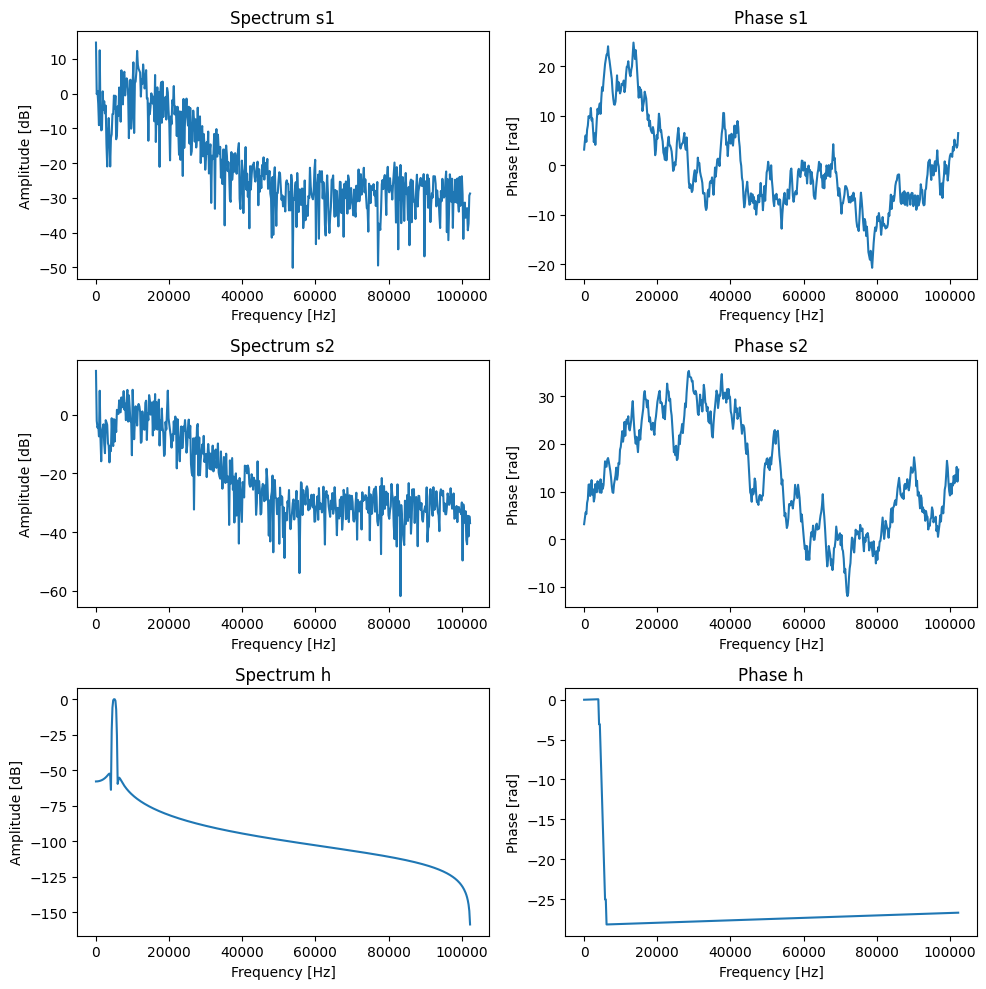

In [139]:
plotting_spectrum(s1, s2, h, "s1", "s2", "h")

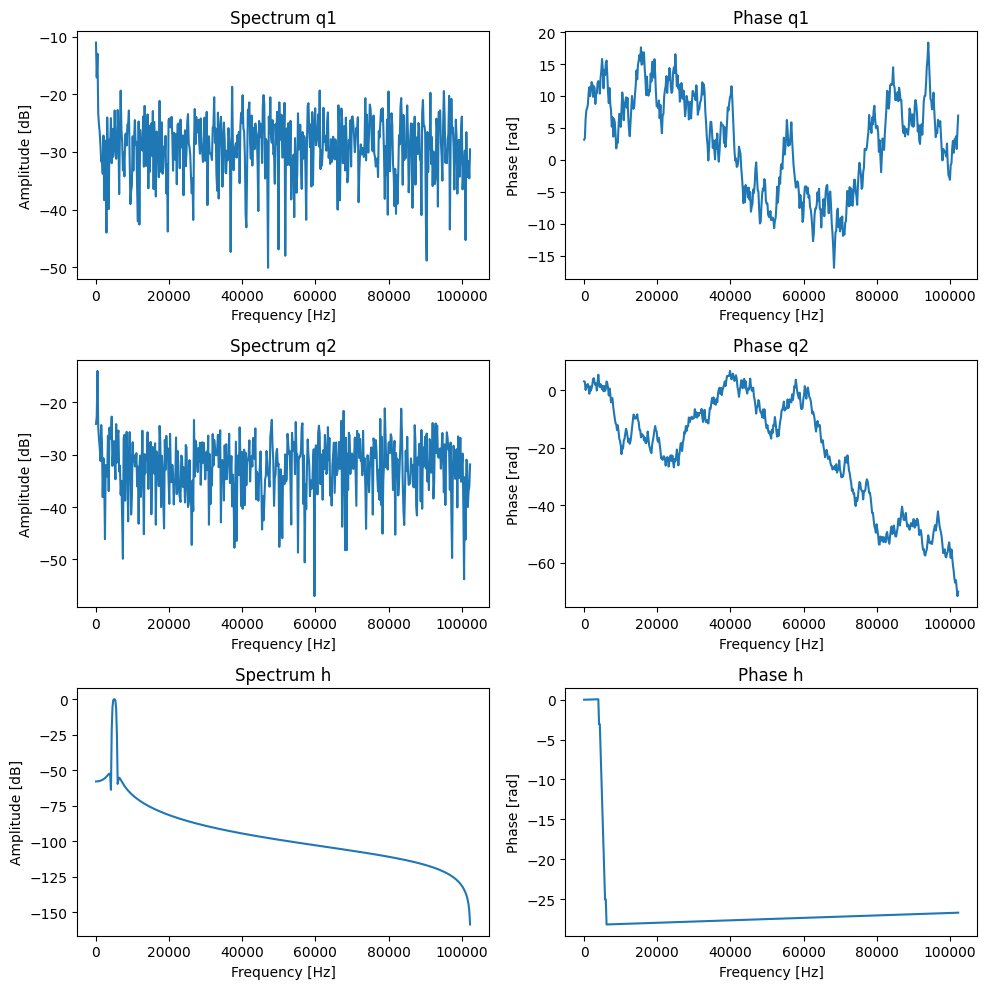

In [140]:
plotting_spectrum(q1, q2, h, "q1", "q2", "h")   


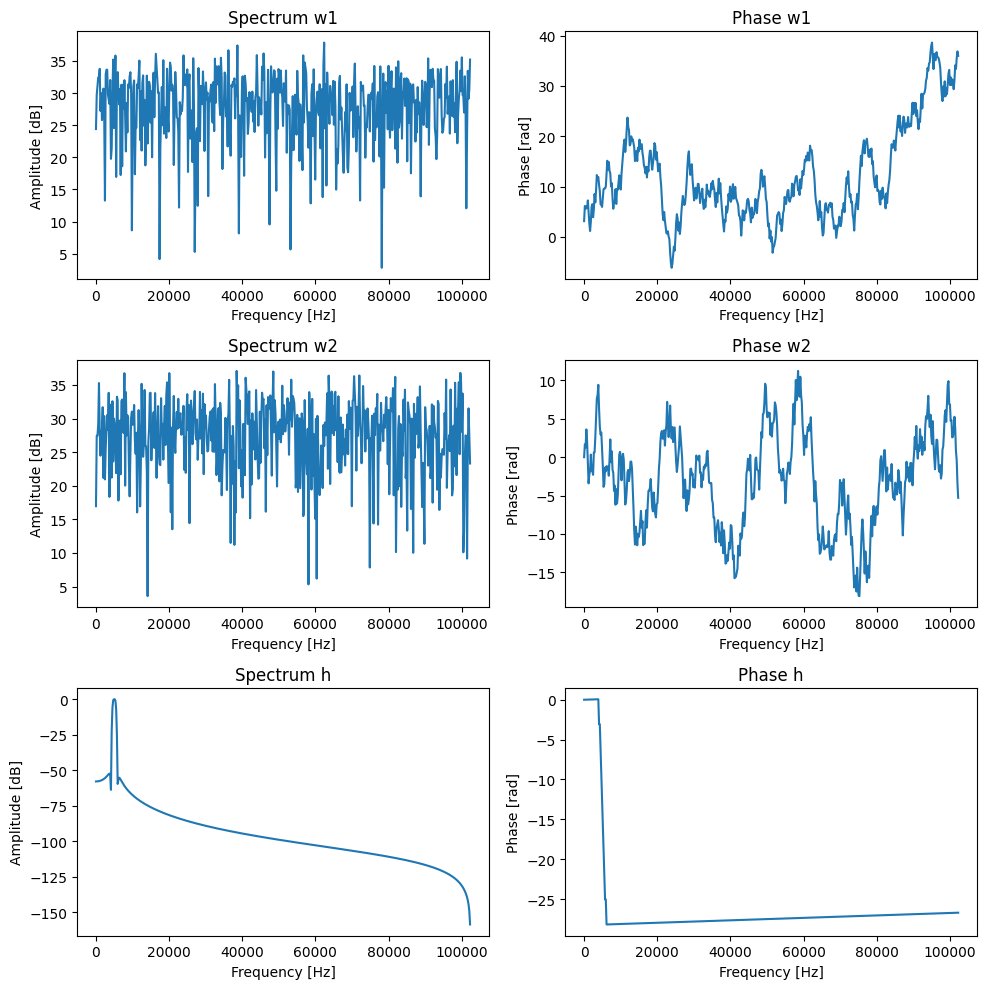

In [141]:
plotting_spectrum(w1, w2, h, "w1", "w2", "h")

#### Plotting the auto correlation

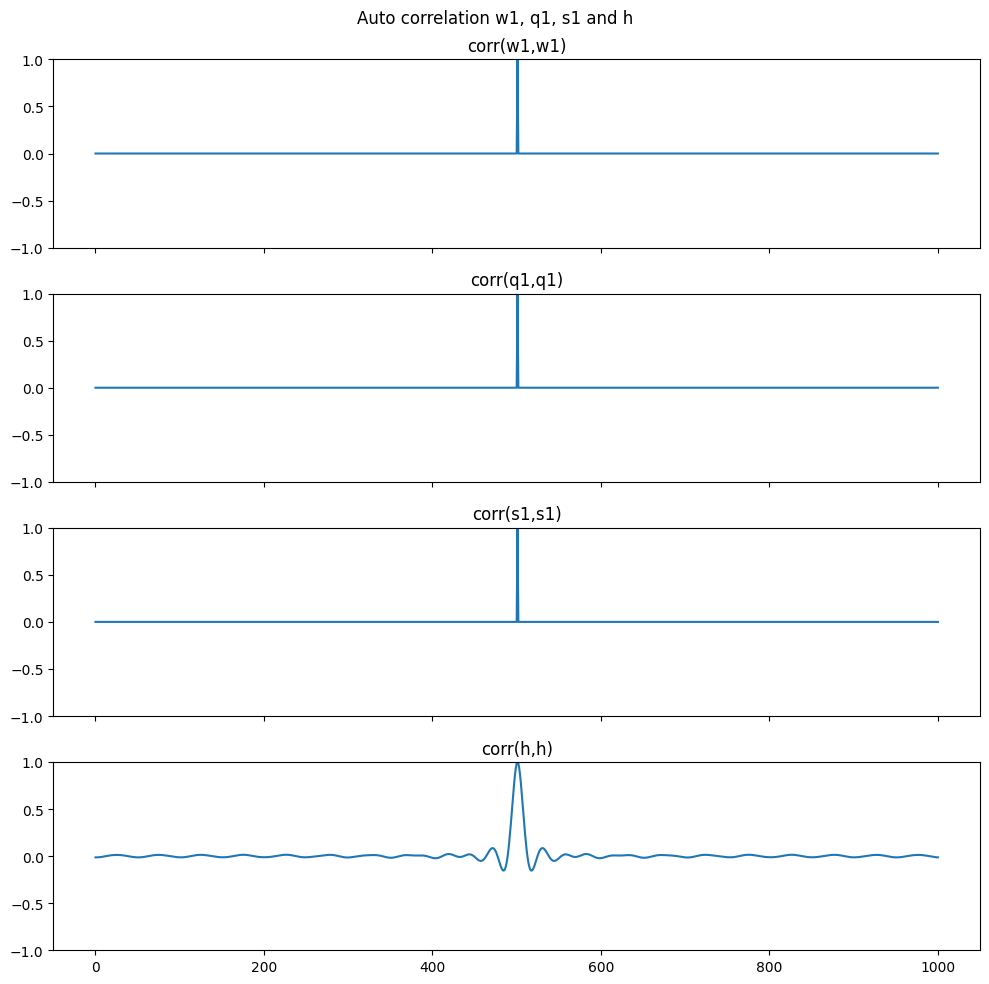

In [120]:
plotting_auto_corr(w1, q1, s1, h, "w1", "q1", "s1", "h", 1)

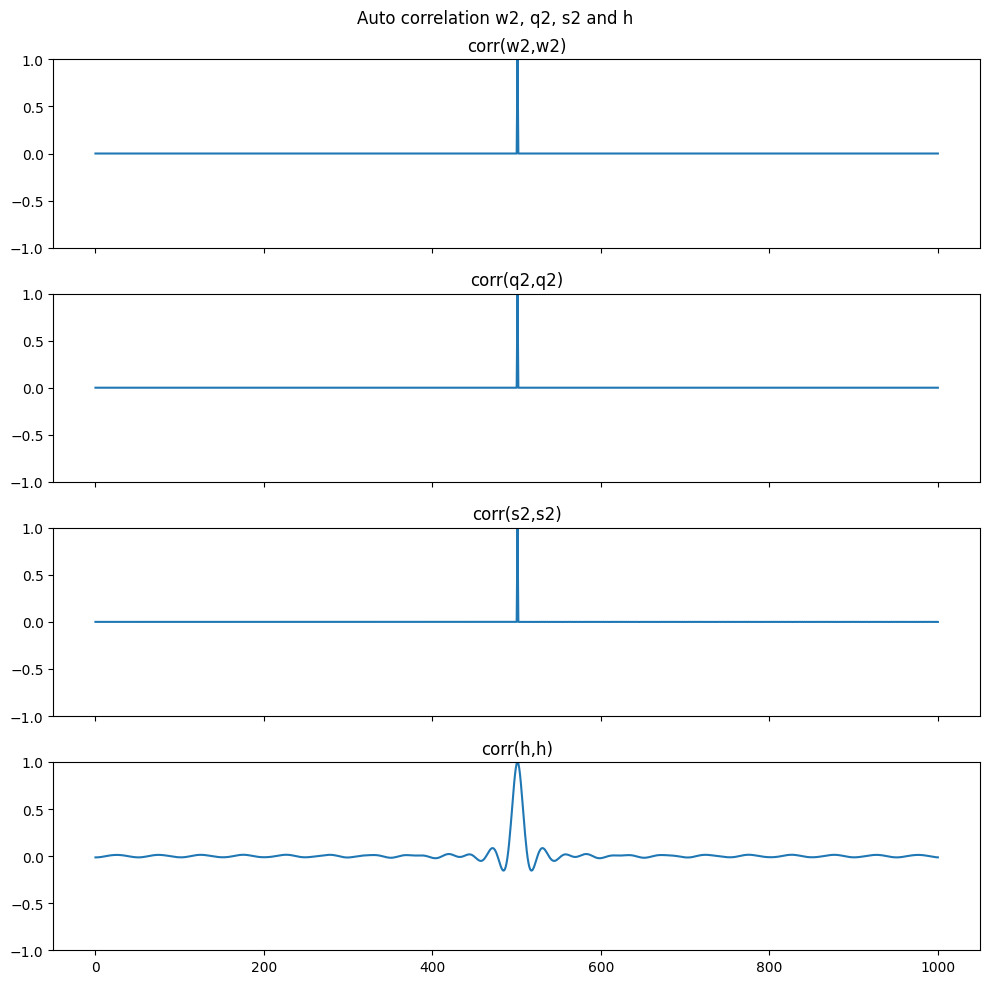

In [121]:
plotting_auto_corr(w2, q2, s2, h, "w2", "q2", "s2", "h", 1)

#### Filtering the signals and then plotting the auto correlation

In [133]:
w1_filt = signal.lfilter(filter_coefficients, 1, w1)
w2_filt = signal.lfilter(filter_coefficients, 1, w2)
q1_filt = signal.lfilter(filter_coefficients, 1, q1)
q2_filt = signal.lfilter(filter_coefficients, 1, q2)
s1_filt = signal.lfilter(filter_coefficients, 1, s1)
s2_filt = signal.lfilter(filter_coefficients, 1, s2)

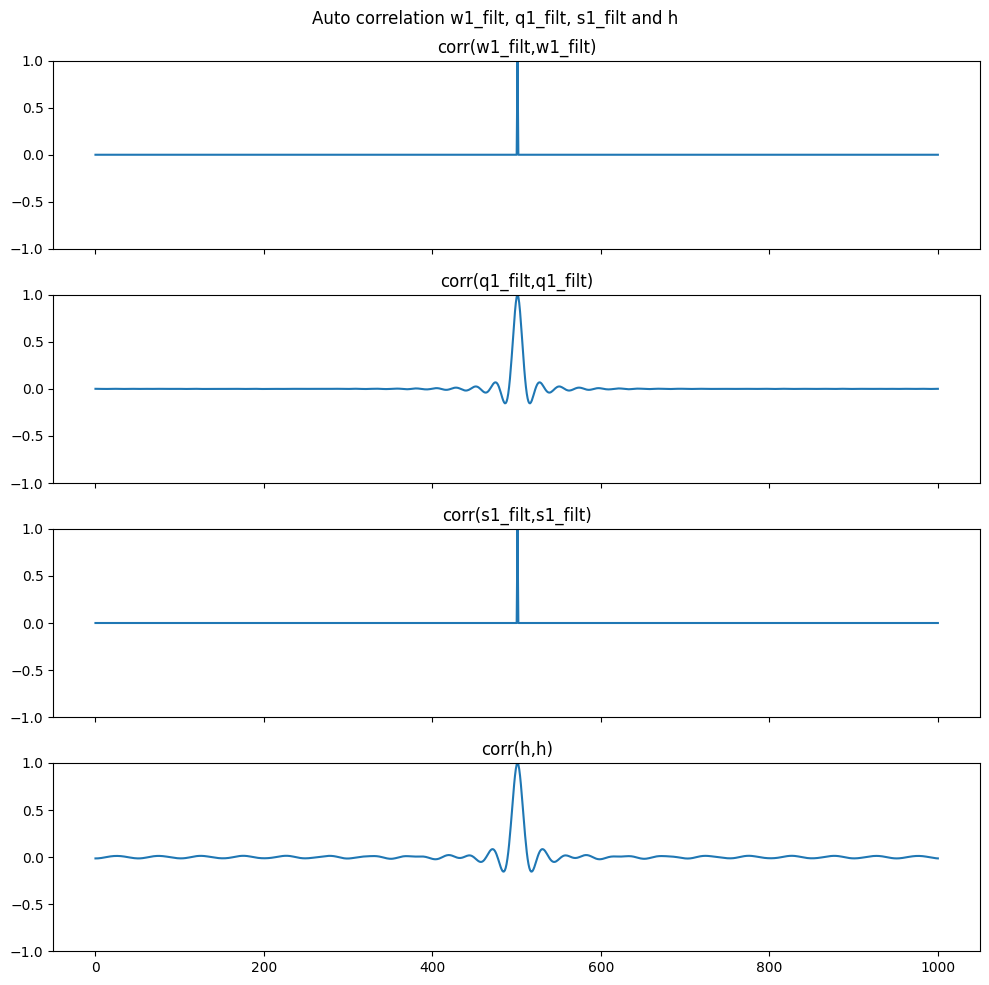

In [134]:
plotting_auto_corr(w1_filt, q1_filt, s1_filt, h, "w1_filt", "q1_filt", "s1_filt", "h", 1)


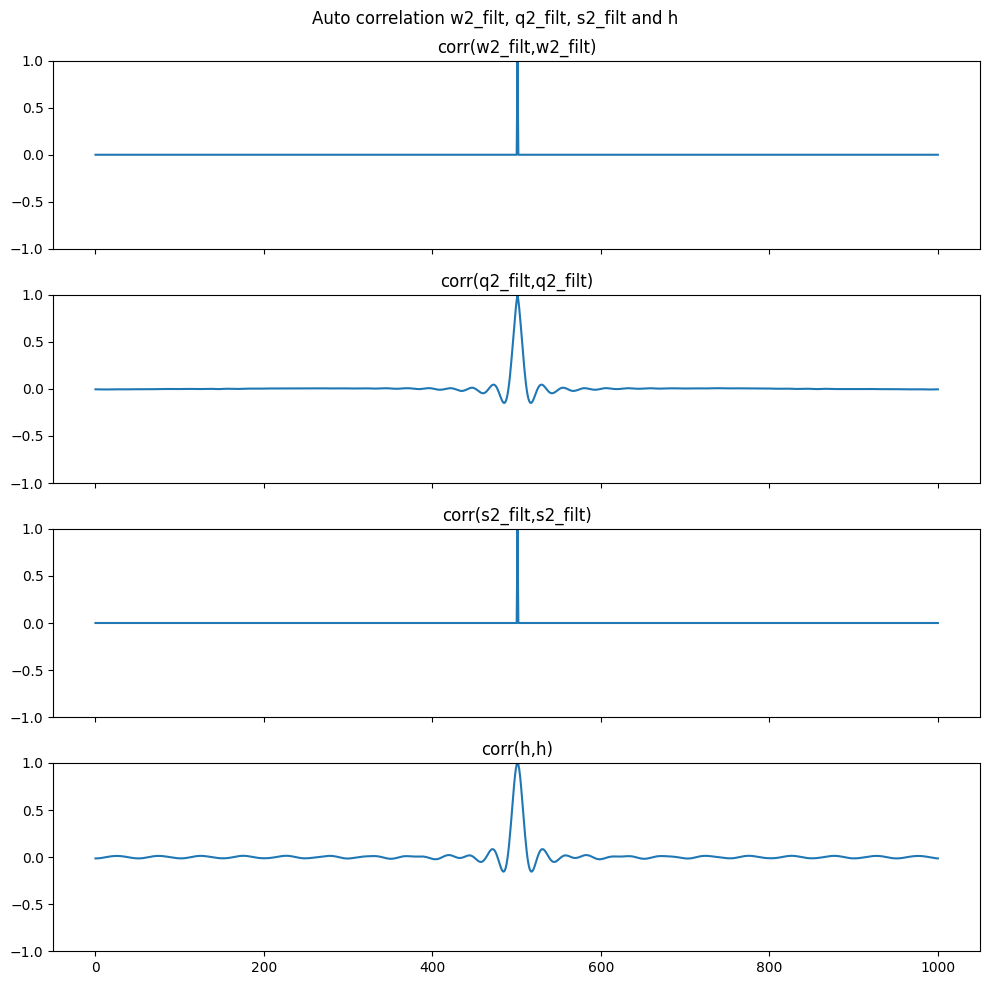

In [135]:
plotting_auto_corr(w2_filt, q2_filt, s2_filt, h, "w2_filt", "q2_filt", "s2_filt", "h", 1)

#### Plotting the spectrum after filtering the signals


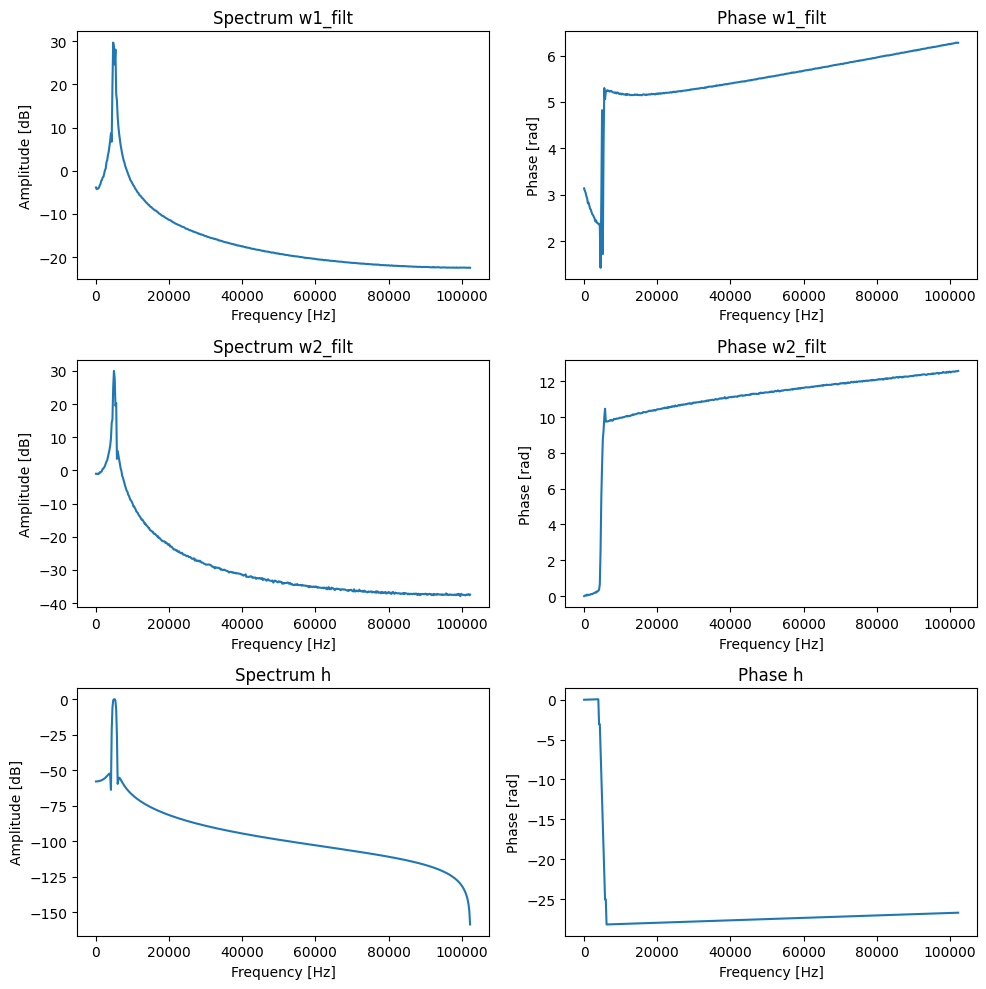

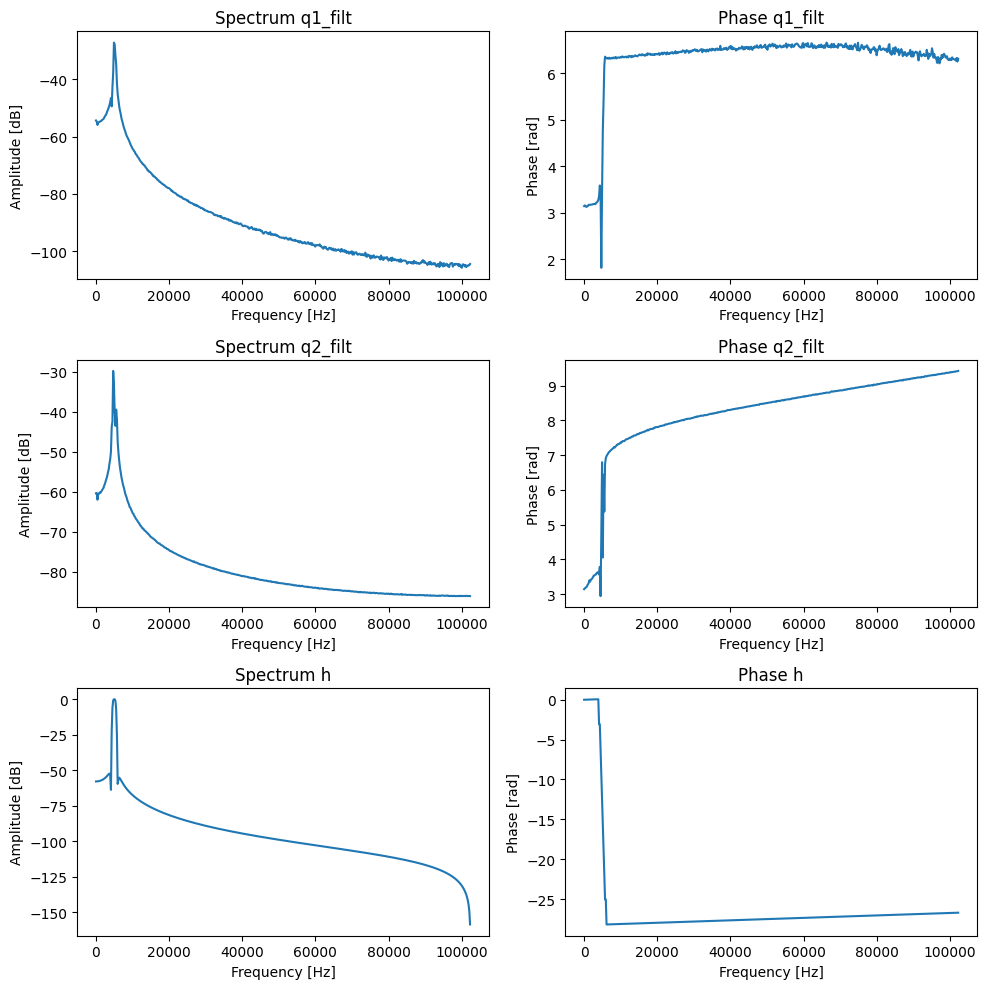

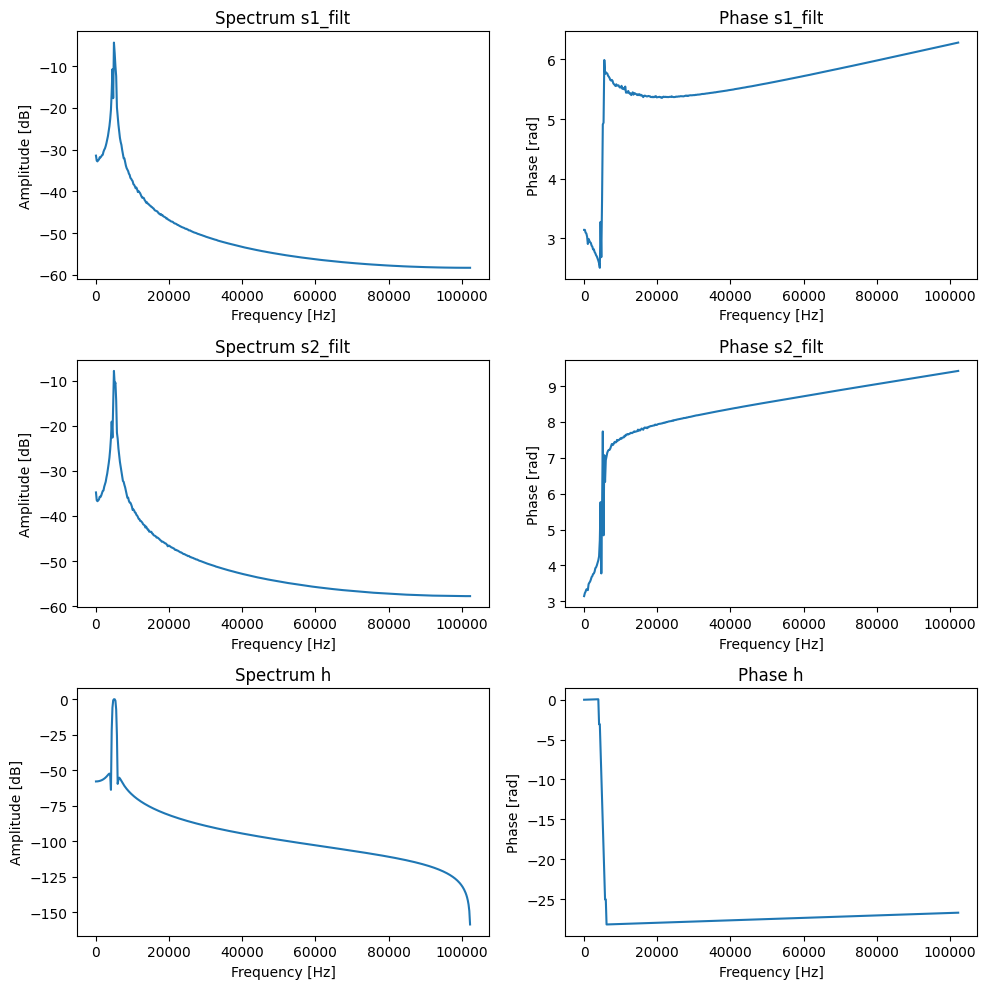

In [142]:
plotting_spectrum(w1_filt, w2_filt, h, "w1_filt", "w2_filt", "h")
plotting_spectrum(q1_filt, q2_filt, h, "q1_filt", "q2_filt", "h")
plotting_spectrum(s1_filt, s2_filt, h, "s1_filt", "s2_filt", "h")


#### Regner ut filterets effect på s1 signal

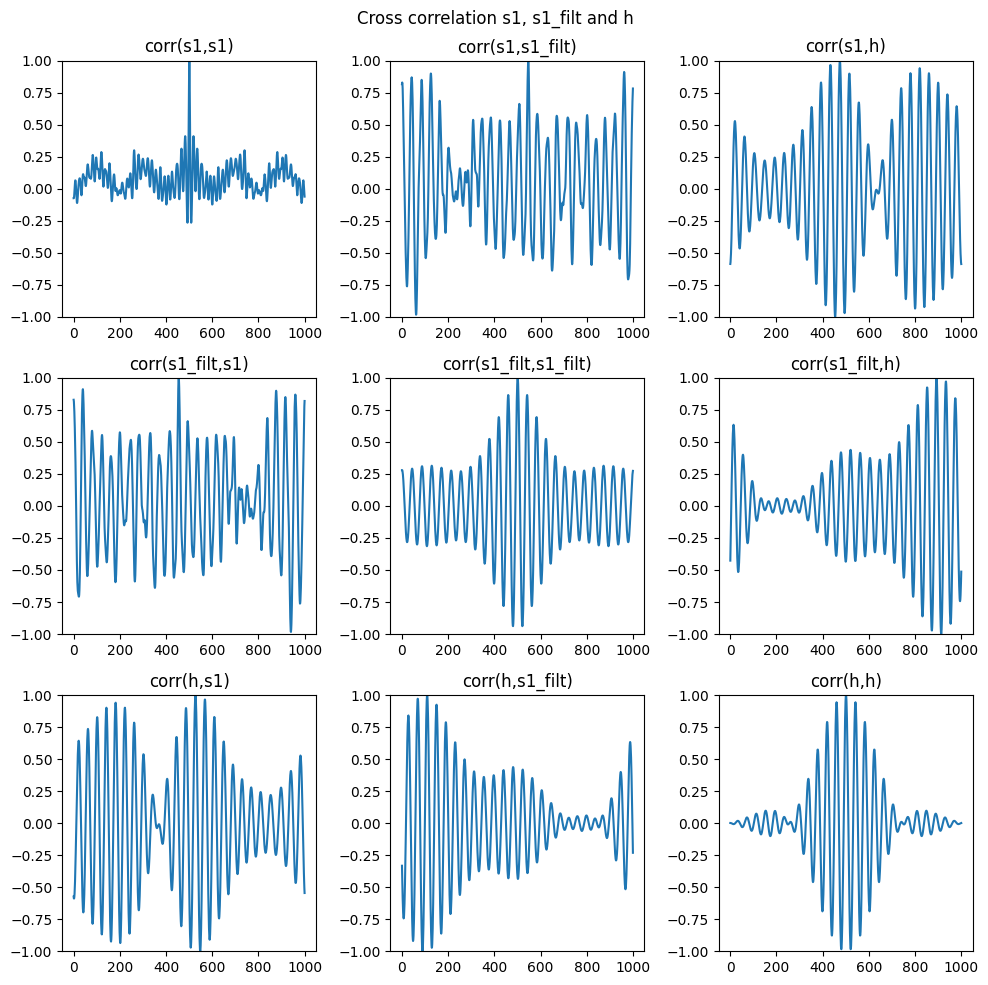

In [143]:
beta = 0
s1_filt = signal.lfilter(filter_coefficients, 1, s1)
plotting_cc(s1, s1_filt, h, "s1", "s1_filt", "h", beta)


#### Looking at the noise

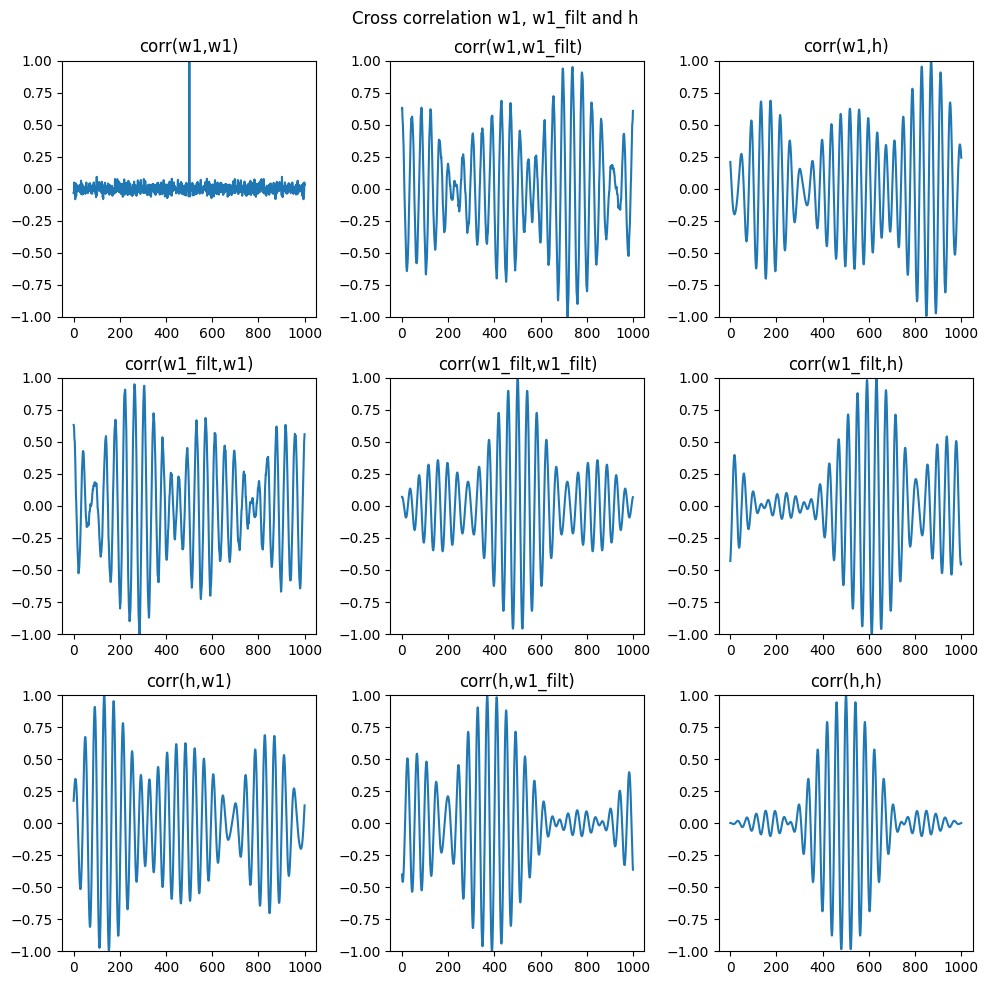

In [144]:
w1_filt = signal.lfilter(filter_coefficients, 1, w1)
plotting_cc(w1, w1_filt, h, "w1", "w1_filt", "h", beta)


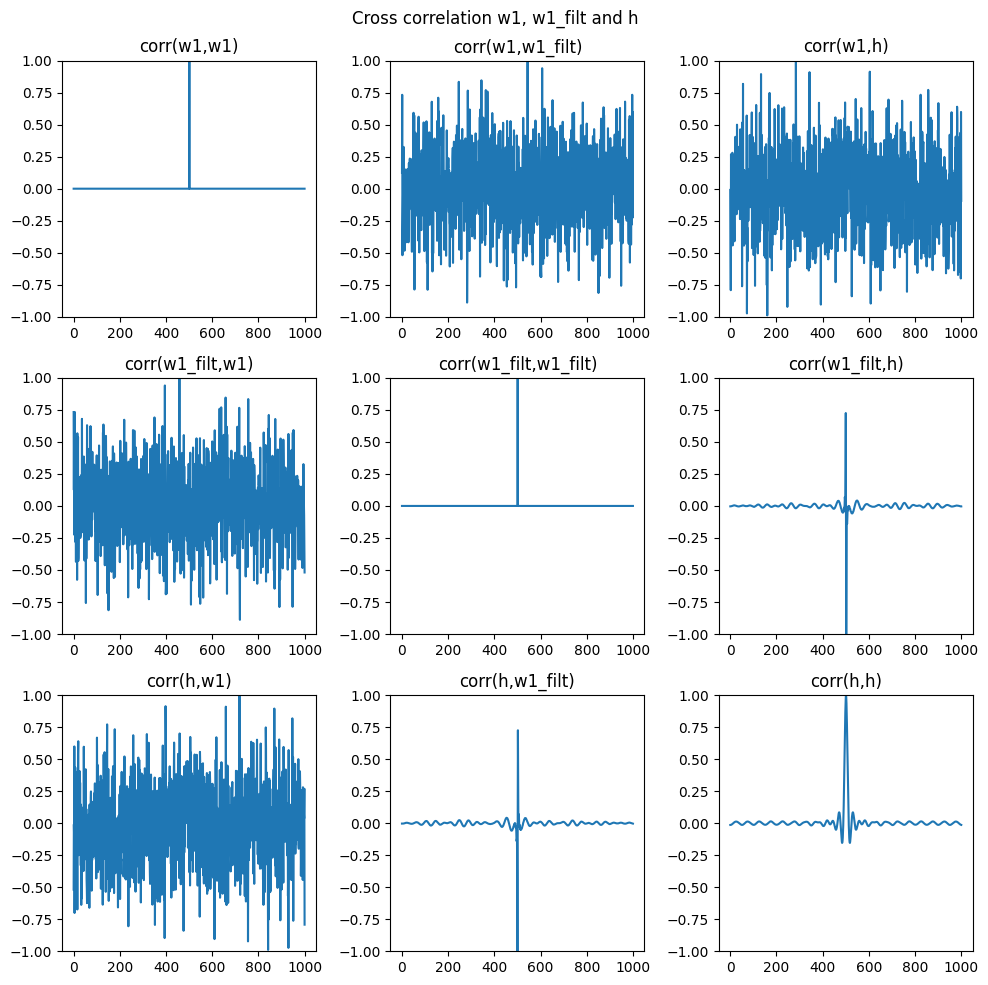

In [145]:
beta = 1
plotting_cc(w1, w1_filt, h, "w1", "w1_filt", "h", beta)
